<a href="https://colab.research.google.com/github/brash99/PhysicsLabs/blob/main/PHYS202L/JupyterNotebooks/Lab6/Lorentz_Force_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6:  Lorentz Force

# Theory

# Determining the Speed of the Electron
From conservation of energy, we know that the electron will be ejected from an “electron gun” with a kinetic energy
that is related to the accelerating voltage, $V_{a}$:
$$\frac{1}{2}mv^2=qV_{a}\tag{2}$$

We can re-arrange this equation for the speed of the electron:
$$v=\sqrt{\frac{2qV_{a}}{m}}\tag{3}$$

where $m$ is the electron’s mass.

# Computing the Applied Fields

The electric and magnetic fields themselves are not known, but the voltages and currents that will be used to make
them will be measurable.

The Magnetic Field:

The law of Biot and Savart tells us that the magnetic field produced on the axis of one Helmholtz coil of $N$ turns of
wire with a radius of $R$ is given by

$$B=\frac{\mu_{0}NI}{2}\frac{R^2}{(R^2+ y^2)^{\frac{3}{2}}}\tag{4}$$

where $y$ is the distance away from the plane of the coil along the axis. In the experiment, a pair of Helmholtz coils
will be held apart a distance equal to the radius of one of the coils. At the center of this configuration, the magnetic
field will be

$$B = 2(\frac{\mu_{0}NI}{2})\frac{R^2}{(R^2+(\frac{R}{2})^2)^{\frac{3}{2}}}$$
$$=\mu_{0}NI\frac{1}{R}\frac{1}{(1+\frac{1}{4})^{\frac{3}{2}}}$$
$$=(\frac{4}{5})^{\frac{3}{2}}\frac{\mu_{0}N}{R}I\tag{5}$$


The Electric Field:


We could compute the electric field from the plate voltage, $V$, from
$$E=\frac{V_{p}}{d_{eff}}\tag{6}$$

where $d$ is the effective distance between the plates. It is not the actual distance because the parallel-plate capacitor
approximation isn’t quite good enough for these long, thin plates. What we do know (or, better yet, can measure) is the deflection of the electron beam after it travels the 10 cm across the measurement grid. The time it takes the electrons to traverse the grid is: t = Δx/v. The vertical acceleration of the electrons is given by
$$a=\frac{F}{m}=\frac{qE}{m}\tag{7}$$

The vertical distance that the electron then travels is given by kinematics:

$$\Delta y=\frac{1}{2}at^2=\frac{qE}{2m}t^2=\frac{qE}{2m}(\frac{\Delta x}{v})^2\tag{8}$$

If we have measured the deflection, we can find the electric field by rearranging Equation (8):

$$E=\frac{2m(\Delta y)v^2}{q (\Delta x)^2} =4V_{a}\frac{\Delta y}{(\Delta x)^2}\tag{9}$$

Where we have substituted in Equation (3) for the velocity of the electron. Setting $E=V/d$ we find that

$$d_{eff} =\frac{V_{p}}{\Delta y}\frac{(\Delta x)^2}{4 V_{a}}\tag{10}$$


# Determining the Lorentz Force

By Radius of Curvature:

If we apply a magnetic field at right angles to the electron’s motion, we find that the electron moves in circular motion. Equating the Lorentz Force with the centripital force required to keep the electron moving in a circle we find
that:
$$qvB=m\frac{v^2}{R}\tag{11}$$

If we now rearrange this equation and substitute in equation (3) for the speed of the electron, we find that:

$$BR=\frac{B}{\frac{1}{R}}=\sqrt{\frac{2mV_{a}}{q}}\tag{12}$$

The odd-looking fraction gives us a way to graphically determine the validity of the Lorentz force law (Equation 1):
If we create a graph of $B$ vs. $1/R$, the slope should be the constant value given in Equation (12).

By Balancing with an Electric Force:

If, instead of measuring the radius of curvature of the electron’s path, we apply an electric field of a known strength,
the electric and magnetic forces are balanced when:
$$qE=qvB ⇒ v=\frac{E}{B}\tag{13}$$

# Uncertainty Analysis
We have many cases where we will want the uncertainty in a quantity: the velocity of the electron, the applied magnetic field, and the effective plate distance. We have three equations (3, 5, and 10) with which we could use propagation of errors, but as you already know, computing these values is very tedious.
Equation (5), for example, tells us what the magnetic field will be given the radius, number of turns, and applied
current in a pair of perfectly-made coils exactly a distance $R$ apart. Experimentally, however, the magnetic field
must be slightly different from the theoretical predictions because the coils have a finite thickness and the separation
between the coils will not be exactly $R$. Instead of using the product rule to estimate uncertainties, it is better (and
easier!) to actually measure the magnetic field as a function of current. Then, by fitting the measured $B$ vs. $I$ curve with a linear fit, the slope tells us the constant of proportionality between the applied current and generated magnetic
field:

$$B=\gamma I\tag{14}$$

 It is much easier to perform propagation of errors on this equation knowing the measured uncertainty in $\gamma$ and the
uncertainty in the applied current, $I$.
Similarly, equation (10) gives us the effective plate spacing but it is much easier to plot plate voltage, $V$, versus deflection distance, $\Delta y$. Once again, this slope (multiplied by a constant) gives us our effective plate gap and, using
the reported uncertainty in that slope, we can use propagation of errors on equation (6) instead.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Determining the Relationship Between Magnetic Field and Current

To begin, we will measure the magnetic field produced by
the Helmholtz coils and compare that field with equation
(5).
1. Plug in the Magnetic Field Sensor into Analog channel “A” and turn on the PASCO 850 interface.
2. Make sure the switches on the sensor are set to “Radial” (horizantal) and “1x.”
3. Start the Capstone program and drag one Graph, one Digits, and one Table onto the main window.
4. Click on the “Hardware Setup” tab in the in the left pane.
5. Click on the Analog channel “A” port in the diagram and select the “Magnetic Field Sensor.”
6. Close the tab by clicking “Hardware Setup” again.
7. For the “Select Measurement” button on the Digits display, select “Magnetic Field Strength (1x).”
8. In the title bar for the Digits display, click on the left-most (greenish) button which increases the number of decimal digits shown. You should click this button until you see five decimal places displayed.

The graph can be used to verify that you are getting good
values for the magnetic field. Otherwise, your data can
simply be read off the Digits display.
The Helmholtz coils have a maximum current rating
of 2A. We will now configure the Helmholtz coils and set the current limiter on the 24 V power supply:

1. Ensure that both Helmholtz coils are securely installed into the fixture with the “A” and “Z” connection labels facing away from each other.
2. With the power supply turned off and both (DC) knobs rotated fully CCW, plug the positive side of the power supply into the “A” port of the left coil and the negative side into the “A” port of the right coil.
3. Connect the two “Z” ports together with a short cable.
4. Turn on the power supply and rotate the voltage knob fully clockwise.
5. Slowly rotate the current knob until the current reading is 2.0 A. The current limit is now set. Do not touch this knob for the remainder of the experiment. If you do, you will have to start again with step 1.
6. Turn the voltage knob fully CCW.

You are now ready to take data:
1. Carefully set the Hall Probe in the upper arm of the fixture (see Figure 1.) You might use a piece of tapeto help secure it in position with the controls facing towards you.
2. Carefully press the “TARE” button.
3. Take magnetic field data every 0.2 A by rotating the voltage knob only. Enter this data into your table and compare the slope of your graph to equation (5).
4. Rotate the voltage knob fully CCW and turn off the power supply when you are done. N.B. The Hall probe reading may drift at a rate of up to 0.5 μT/s, so your precision will be limited and you will want to try and capture your data within 5–10 minutes of pressing the “TARE” button. The slope of your graph (and its uncertainty) are the values you will need to utilize equation (14).

In [4]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [i, di, B, dB] (current (amp), magnetic field (Tesla))
# enter the data manually...
data1 = [[0.2, 0.01, 0.00093, 0.0001],
         [0.4, 0.01, 0.00169, 0.0001],
         [0.6, 0.01, 0.00254, 0.0001],
         [0.8, 0.01, 0.00337, 0.0001],
         [1.0, 0.01, 0.00413, 0.0001],
         [1.2, 0.01, 0.00495, 0.0001],
         [1.4, 0.01, 0.00577, 0.0001],
         [1.6, 0.01, 0.00659, 0.0001],
         [1.8, 0.01, 0.00739, 0.0001]]

# create dataframe
df1 = pd.DataFrame(data1, columns = ['i', 'di','B','dB'])

"""
# ... or import the data from capstone (save and upload .csv file)
df1 = pd.read_csv("./TvA.csv")
"""

print('Helmholtz Coil Calibration:')
print(df1.to_string(index=False))

Helmholtz Coil Calibration:
  i   di       B     dB
0.2 0.01 0.00093 0.0001
0.4 0.01 0.00169 0.0001
0.6 0.01 0.00254 0.0001
0.8 0.01 0.00337 0.0001
1.0 0.01 0.00413 0.0001
1.2 0.01 0.00495 0.0001
1.4 0.01 0.00577 0.0001
1.6 0.01 0.00659 0.0001
1.8 0.01 0.00739 0.0001


Beta: [0.00404838 0.00010274]
Beta Std Error: [1.30981767e-05 1.47414856e-05]
Beta Covariance: [[ 4.84958804e-09 -4.84958363e-09]
 [-4.84958363e-09  6.14278987e-09]]
Residual Variance: 0.03537666134062164
Inverse Condition #: 0.03915695383066051
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.0040 +/- 0.0000)X + (0.000103 +/- 0.000015)


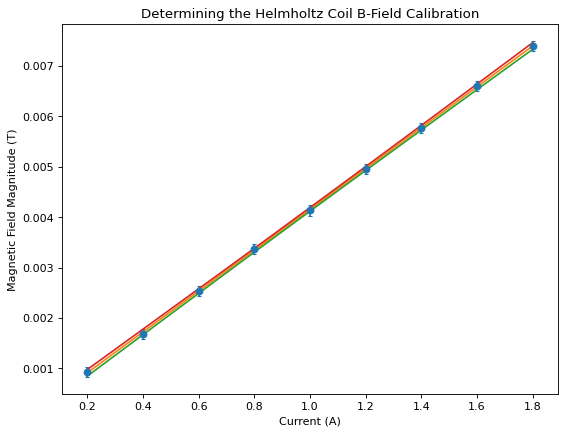

In [5]:
xi = df1['i']
yi = df1['B']
sigmaxi = df1['di']
sigmayi = df1['dB']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = mx + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[0.05, 0.00]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)X + (%0.6f +/- %0.6f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('Current (A)')
plt.ylabel('Magnetic Field Magnitude (T)')
plt.title('Determining the Helmholtz Coil B-Field Calibration')
plt.show()

gamma = np.abs(popt[0])
dgamma = np.abs(perr[0])


## Calibration of Electric Field Plates - Determining d_eff
We now need to insert the Cathode Ray Tube into the holder and connect it to power.
1. Mechanical Assembly:
    1. Remove the Hall probe and set it aside.
    2. Remove both coils from the assembly. You can leave the banana cables plugged into them if possible.
    3. Call your instructor over and have them carefully insert the cathode ray tube into position.
    4. Replace the two coils in the same orientation and with the same wiring as in the previous section.
2. Electron Gun Connections:
    1. Pick one of the two HV power supplies to run the electron gun. Ensure that it is switched OFF and the voltage knob is rotated fully CCW. It will have two high-voltage terminals, a ground terminal, and two AC voltage terminals. You will need:
        1. Two (2) blue banana plug cables
        2. One (1) short red banana plug cable
        3. Two (2) short black banana plugcables
        4. One (1) long red female-to-female banana cable.
    2. Power the heater: Connect the AC voltage sockets (yellow) to the heater inputs on the back of the black cap of the Cathode Ray Tube (CRT) with the two blue banana plug cables.
    3. Power the accelerating grid:
        1. Connect the negative (black) high-voltage terminal to one of the blue heater cables (it doesn’t matter which one) with a short black cable.
        2. Plug the short red cable into the positive (red) high-voltage terminal.
        3. Plug the other end of the red cable into the “plastic brick” end of the long red female-to-female cable.
        4. Connect the other end of the long red female-to-female cable to the anode pin on the neck of the CRT. Be gentle: you’re working with a thin glass tube!
        5. Connect the positive (red) high-voltage terminal to the ground (GND) terminal with a short black cable.

At this point, the connections should look like those in Figure 2.

3. Electric Field Plate Connections:
    1. Your other HV power supply will power the electric field plates. You will only need to use the black and red HV connections and the ground terminal. You will not need the AC connections. **Again, make sure the power supply is switched off and the voltage control knob is fully CCW.** You will need:
        1. One (1) barrel connector
        2. One (1) long black cable
        3. One (1) short red cable
        4. One (1) red female-to-female cable
        5. One (1) short black cable
    2. Attach a barrel connector to the lower pin on the CRT. Be Gentle. It should not need too much force.
    3. Connect the negative (black) terminal of the HV power supply to the barrel connector with a long black cable.
    4. Plug the short red cable into the positive (red) terminal of the HV power supply.
    5. Plug the other end of the red cable into the “plastic brick” end of the long red female-to-female cable.
    6. Connect the other end of the long red female-to-female cable to the upper pin on the CRT. Be gentle. It should not need much force.
    7. Connect the positive (red) high-voltage terminal to the ground (GND) terminal with a short black cable.

Have your instructor check all three sets of connections before continuing!

4. Data Acquisition: You are now ready to compute the slope of a graph of equation (10).

    1. Turn on the HV power supply connected to the electron gun and set the accelerating voltage to 2.50 kV.
    2. Wait until you see the glowing blue trail of electrons on the mica screen.
    3. Note carefully the height of the beam at the x=10 cm mark.
    4. Turn on the HV power supply connected to the electrode plates and slowly increase the voltage until the beam is 0.5 cm above its original height. Record the voltage. Do this for heights of 0.5, 1.0, 1.5, and 2.0cm.
    5. Reduce the plate voltage to zero volts.
    6. Plot the data and use equation (10) to compute the effective plate gap.
    7. You can now use equation (6) to compute the applied electric field from the plate voltage.

In [6]:
# Create a Pandas DataFrame with data for part 2

# The data elements are [Vp, dVp, y, dy]

data2 = [[540.0,10.0,0.005,0.0010], [980.0,10.0,0.010,0.0010],
         [1410.0,10.0,0.015,0.0010], [1830.0,10.0,0.020,0.0010]]
# create dataframe
df2 = pd.DataFrame(data2, columns = ['Vp', 'dVp','y','dy'])



print('Electric Field Calibration:')
print(df2.to_string(index=False))

Electric Field Calibration:
    Vp  dVp     y    dy
 540.0 10.0 0.005 0.001
 980.0 10.0 0.010 0.001
1410.0 10.0 0.015 0.001
1830.0 10.0 0.020 0.001


Beta: [ 1.16266662e-05 -1.33573278e-03]
Beta Std Error: [8.55039837e-08 1.09740239e-04]
Beta Covariance: [[ 1.09617023e-12 -1.30444206e-09]
 [-1.30444206e-09  1.80566470e-06]]
Residual Variance: 0.006669521818915446
Inverse Condition #: 0.0002917429621873361
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.000011627 +/- 0.000000086)X + (-0.001335733 +/- 0.000109740)


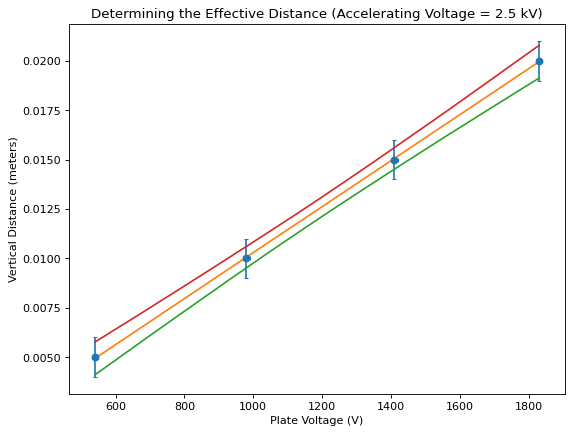

In [7]:
xi = df2['Vp']
yi = df2['y']
sigmaxi = df2['dVp']
sigmayi = df2['dy']

##############################

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.1, 2.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f)X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('Plate Voltage (V)')
plt.ylabel('Vertical Distance (meters)')
plt.title('Determining the Effective Distance (Accelerating Voltage = 2.5 kV)')
plt.show()

In [8]:
Va = 2500.0
dVa = 10.0

x = 0.10
dx = 0.001

C = popt[0]
dC = perr[0]

deff = x**2/(4*C*Va)

ddeff = deff*(dVa/Va+2.0*dx/x+dC/C)

print('d$_{eff}$ = (%0.4f +/- %0.4f)' % (deff,ddeff))

d$_{eff}$ = (0.0860 +/- 0.0027)


In [9]:
from io import DEFAULT_BUFFER_SIZE
# Create a Pandas DataFrame with data for part 2

# The data elements are [Vp, dVp, i, di]

data3 = [[600.0,10.0,0.05,0.0010], [1150.0,10.0,0.10,0.0010],
         [1560.0,10.0,0.15,0.0010], [1880.0,10.0,0.20,0.0010], [2200,10,0.25,.0010]]

# create dataframe
df3 = pd.DataFrame(data3, columns = ['Vp', 'dVp','i','di'])

df3['B'] = gamma*df3['i']
df3['dB'] = df3['B']*(dgamma/gamma+df3['di']/df3['i'])

df3['E'] = df3['Vp']/deff
df3['dE'] = df3['E']*(ddeff/deff+df3['dVp']/df3['Vp'])

print('Velocity Selector:')
print(df3.to_string(index=False))

Velocity Selector:
    Vp  dVp    i    di        B       dB            E         dE
 600.0 10.0 0.05 0.001 0.000202 0.000005  6975.999716 334.993045
1150.0 10.0 0.10 0.001 0.000405 0.000005 13370.666122 535.492230
1560.0 10.0 0.15 0.001 0.000607 0.000006 18137.599261 684.955259
1880.0 10.0 0.20 0.001 0.000810 0.000007 21858.132442 801.609330
2200.0 10.0 0.25 0.001 0.001012 0.000007 25578.665624 918.263401


## Measuring the Lorentz Force on the Electron

You are now ready to verify the Lorentz Force law. Make sure that the electron beam is visible in the tube and is perfectly horizontal.
1. Increase the current (by increasing the voltage) on the Helmholtz coils by 0.05 A.
2. Determine the height of the beam at every “x” value from 2 cm to 10 cm.
3. Use the Mathematica notebook “circlefit.nb” to find the best-fit radius of curvature and its uncertainty.
4. Increase the plate voltage until the beam is once again horizontal.
5. Record your results in the Raw Data Table using equations (12) and (14).
6. Return the plate voltage to zero.
7. Repeat steps 1–6 until the current is at 0.25 A (or you’ve taken at least five data points)

Beta: [2.41709007e+07 2.51898050e+03]
Beta Std Error: [1.70223239e+06 8.27247877e+02]
Beta Covariance: [[ 9.24713064e+11 -3.79509914e+08]
 [-3.79509914e+08  2.18393956e+05]]
Residual Variance: 3.1335072830971886
Inverse Condition #: 0.0002602297262170887
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (24170900.7273 +/- 1702232.3937)X + (2518.9805 +/- 827.2479)


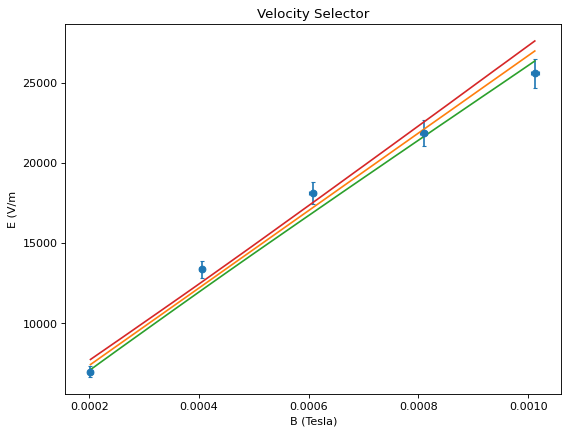

In [10]:
xi = df3['B']
yi = df3['E']
sigmaxi = df3['dB']
sigmayi = df3['dE']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Non-Linear function y = a*(x-c)^b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[2.11, 2.0]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
xl = np.linspace(xi[0],xi[len(xi)-1],100)
ysample=np.asarray([fitfunction(pl,xl) for pl in ps])
ysample = np.nan_to_num(ysample)

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.4f +/- %0.4f)X + (%0.4f +/- %0.4f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xl,middle)
plt.plot(xl,lower)
plt.plot(xl,upper)

#########################

plt.xlabel('B (Tesla)')
plt.ylabel('E (V/m')
plt.title('Velocity Selector')
plt.show()

In [11]:
Va = 2500.00
dVa = 10.00

q = 1.602E-19
m = 9.11E-31

v_expected = np.sqrt(2.0*q*Va/m)

print(v_expected)


29652210.162283562


## Clean Up
Once you've completed the experiment, return your apparatus to a safe state by following these steps in this order:
1. Ensure you have all the data you need to write your report (see the next page). You might consider upload-
ing your data to your Google Drive.
2. Rotate all knobs on all Power Supplies fully CCW and turn them off.
3. Gently unplug all cables from your assembly and return them to the bag.
4. Carefully remove the Helmholtz coils from the assembly. Do not remove the CRT.
5. Shut down the Capstone program and reboot the computer.

## Troubleshooting Capstone’s Curve Fitting Algorithm
To determine the slopes of your plotted data, you will use Capstone’s curve fitting algorithm (most notably, the “lin -
ear fit”). Sometimes this algorithm needs help in finding the correct fit. You can tell that this is true when the
drawn curve poorly matches the data points. The slope might be exactly zero or one and the Mean Squared Error
(MSE) will also be over 0.1.

To help Capstone attempt a better fit, first, click on the box where the incorrect values are reported. On the left pane
will be a “Curve Fit Editor” tab that you should click. Within that tab are the starting values Capstone is assuming.
Some of these values will be “locked” (not be allowed to vary) when they should be and vice versa. You will need
to make some educated guesses as to the correct fit parameters, enter them into the boxes, and click “Update Fit.”
You will know if the fit has updated properly, but if you’re not sure, ask your instructor because incorrect data will
lead to incorrect results!